Preliminary: Setting up the workspace: Importing libraries. load and explore the data. We will be using pandas to collect the data 

In [326]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
# will show graphs in notebook

Step 1: Collect Data: Only uploading relevant files

In [327]:
# Load the data
data = pd.read_csv("../../Data/Raw Data.csv")
print(data.columns)


Index(['Year', 'Plan', 'Crisis Country', 'Country Code', 'Metric', 'Value',
       'Standardised Plan', 'Appeal Type', 'PiN Value for Dataviz',
       'OUSG Metric'],
      dtype='object')


Step 2: Inspect Data:

In [328]:
# Display the first few rows of the dataframe
data.head()



,Year,Plan,Crisis Country,Country Code,Metric,Value,Standardised Plan,Appeal Type,PiN Value for Dataviz,OUSG Metric
0,2010,Afghanistan,Afghanistan,AFG,People targeted,"7,800,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
1,2010,Afghanistan,Afghanistan,AFG,Funding received,"223,824,925",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding received
2,2010,Afghanistan,Afghanistan,AFG,Funding requirements,"448,551,322",Afghanistan,Consolidated Appeal Process (CAP),NaN,Funding requirements
3,2010,Afghanistan,Afghanistan,AFG,People targeted,"5,400,000",Afghanistan,Consolidated Appeal Process (CAP),NaN,People in need
4,2010,Afghanistan,Afghanistan,AFG,Funding received,"345,246,607",Afghanistan,Consolidated Appeal Process (CAP),NaN,NaN


In [329]:
# Display information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   1259 non-null   int64 
 1   Plan                   1259 non-null   object
 2   Crisis Country         1259 non-null   object
 3   Country Code           1236 non-null   object
 4   Metric                 1259 non-null   object
 5   Value                  1259 non-null   object
 6   Standardised Plan      1259 non-null   object
 7   Appeal Type            974 non-null    object
 8   PiN Value for Dataviz  47 non-null     object
 9   OUSG Metric            619 non-null    object
dtypes: int64(1), object(9)
memory usage: 98.5+ KB


In [330]:
# Display the summary statistics of the dataframe
data.describe()

,Year
count,1259.000000
mean,2017.396346
std,3.972203
min,2010.000000
25%,2014.000000
50%,2017.000000
75%,2021.000000
max,2024.000000


In [331]:
# Check for missing values in the dataframe
data.isnull().sum()

Year                        0
Plan                        0
Crisis Country              0
Country Code               23
Metric                      0
Value                       0
Standardised Plan           0
Appeal Type               285
PiN Value for Dataviz    1212
OUSG Metric               640
dtype: int64

In [332]:
# Check for duplicates in the dataframe
data.duplicated().sum()

np.int64(7)

In [333]:
# Check the data types of the columns in the dataframe
data.dtypes

Year                      int64
Plan                     object
Crisis Country           object
Country Code             object
Metric                   object
Value                    object
Standardised Plan        object
Appeal Type              object
PiN Value for Dataviz    object
OUSG Metric              object
dtype: object

In [334]:
#Drop columns that are not needed
data=data[['Year','Country Code','Metric','Value']]
print(data)




      Year Country Code                Metric          Value
0     2010          AFG       People targeted      7,800,000
1     2010          AFG      Funding received    223,824,925
2     2010          AFG  Funding requirements    448,551,322
3     2010          AFG       People targeted      5,400,000
4     2010          AFG      Funding received    345,246,607
...    ...          ...                   ...            ...
1254  2024          SDN  Funding requirements    281,321,594
1255  2024          SYR  Funding requirements  5,540,000,000
1256  2024          NaN  Funding requirements     73,867,855
1257  2024          UKR  Funding requirements  1,038,000,000
1258  2024          VEN  Funding requirements  1,587,428,979

[1259 rows x 4 columns]


In [335]:
# Check the unique values in the 'country' column of the dataframe
data['Country Code'].unique()

array(['AFG', 'BGD', 'BFA', 'BDI', 'BEN', 'CMR', 'CAF', 'TCD', 'CIV',
       'CUB', 'PRK', 'COD', 'DMA', 'GMB', 'GTM', 'HND', 'DJI', 'ETH',
       'COL', 'HTI', 'KGZ', 'LBR', 'IDN', 'IRN', 'IRQ', 'LKA', 'LSO',
       'MDG', 'KEN', 'LBY', 'MNG', 'MOZ', 'MRT', 'MLI', 'ECU', 'MMR',
       'NAM', 'NER', 'NPL', 'PER', 'SLW', 'NGA', 'PSE', 'NIC', 'PAK',
       'PHL', 'COG', 'SEN', 'SOM', 'SSD', 'JOR', 'LBN', 'SDN', 'SYR',
       'UGA', 'UKR', 'VUT', 'VEN', 'YEM', 'ZWE', nan, 'TZA', 'TGO', 'ZMB',
       'SLV', 'MWI', 'TUR'], dtype=object)

In [336]:
# Check the unique values in the 'Metric' column of the dataframe
data['Metric'].unique()


array(['People targeted', 'Funding received', 'Funding requirements',
       'People in need'], dtype=object)

Step 3: Clean Data: Dropping rows not relevant and removing missing values. Cleaning names.

In [337]:
#Print original column names
print(data.columns)

relevant_metrics = ['People in need', 'Funding received', 'Funding requirements']
#Filter the dataframe to include only relevant metrics
data = data[data['Metric'].isin(relevant_metrics)]
#Check the unique values in the 'Metric' column of the data dataframe after filtering
print(data['Metric'].unique())

#Clean the 'Value' column in the dataframe
data['Value'] = data['Value'].str.replace(',', '')
#Convert the 'Value' column to numeric
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

#Drop rows with missing values in the dataframe
data = data.dropna(subset=['Year','Value'])

#Create a new table with the relevant metrics
data = data.pivot_table(index=['Year', 'Country Code'], columns='Metric', values='Value', aggfunc='sum').reset_index()
#Check the new table
print(data.head())

#Clean column names in the dataframe
data.columns = data.columns.str.replace(' ', '_')
#Check new column names in the dataframe
print(data.columns)



Index(['Year', 'Country Code', 'Metric', 'Value'], dtype='object')
['Funding received' 'Funding requirements' 'People in need']
Metric  Year Country Code  Funding received  Funding requirements  \
0       2010          AFG      3.478400e+09          7.175842e+09   
1       2010          BFA      1.619487e+08          1.260622e+08   
2       2010          BGD      1.445100e+09          2.305400e+09   
3       2011          BDI      6.359000e+08          2.086800e+09   
4       2011          BEN               NaN                   NaN   

Metric  People in need  
0           58650000.0  
1                  NaN  
2            2500000.0  
3            7414000.0  
4            3000000.0  
Index(['Year', 'Country_Code', 'Funding_received', 'Funding_requirements',
       'People_in_need'],
      dtype='object', name='Metric')


Step 4: Identifying Patterns and Correlations: Analysis of questions created

In [338]:
#Here we will answer the question: What are the top 5 countries with the highest number of people in need overall (2010-2024)?
top_people= data.groupby('Country_Code')['People_in_need'].sum().reset_index()
top_people = top_people.sort_values(by='People_in_need', ascending=False).head(5)
print(top_people)

#Here we will answer the question: What are the top 5 countries with the highest number of funding in need overall (2010-2024)?
top_funding= data.groupby('Country_Code')['Funding_received'].sum().reset_index()
top_funding = top_funding.sort_values(by='Funding_received', ascending=False).head(5)
print(top_funding)

#Here we will answer the question: What are the top 5 countries with the highest number of funding requirements overall (2010-2024)?
top_requirements= data.groupby('Country_Code')['Funding_requirements'].sum().reset_index()
top_requirements = top_requirements.sort_values(by='Funding_requirements', ascending=False).head(5)
print(top_requirements)


   Country_Code  People_in_need
54          SYR     252916109.0
63          YEM     225345241.0
8           COD     188173920.0
0           AFG     175176152.0
15          ETH     127560484.0
   Country_Code  Funding_received
54          SYR      2.661977e+10
53          SSD      1.088000e+10
63          YEM      9.724482e+09
48          SDN      6.249274e+09
52          SOM      6.212039e+09
   Country_Code  Funding_requirements
54          SYR          1.022812e+11
53          SSD          3.222092e+10
63          YEM          2.967176e+10
8           COD          2.228797e+10
48          SDN          2.003054e+10


In [339]:
#Here we will answer the question: What are the top 5 countries with the highest number of people in need yearly (2010-2024)?
top_people_yearly= data.groupby(['Year','Country_Code'])['People_in_need'].sum().reset_index()
top_people_yearly = top_people_yearly.sort_values(['Year','People_in_need'], ascending=[True,False]).groupby('Year').head(5)
print(top_people_yearly)

#Here we will answer the question: What are the top 5 countries with the highest number of funding in need yearly (2010-2024)?
top_funding_yearly= data.groupby(['Year','Country_Code'])['Funding_received'].sum().reset_index()
top_funding_yearly = top_funding_yearly.sort_values(['Year','Funding_received'], ascending=[True,False]).groupby('Year').head(5)
print(top_funding_yearly)

#Here we will answer the question: What are the top 5 countries with the highest number of funding requirements yearly (2010-2024)?
top_requirements_yearly= data.groupby(['Year','Country_Code'])['Funding_requirements'].sum().reset_index()
top_requirements_yearly = top_requirements_yearly.sort_values(['Year','Funding_requirements'], ascending=[True,False]).groupby('Year').head(5)
print(top_requirements_yearly)


     Year Country_Code  People_in_need
0    2010          AFG      58650000.0
2    2010          BGD       2500000.0
1    2010          BFA             0.0
6    2011          BGD      21380000.0
7    2011          CMR      13970000.0
..    ...          ...             ...
253  2024          SYR      32500000.0
231  2024          AFG      30966389.0
249  2024          SDN      28072305.0
235  2024          COD      27256000.0
237  2024          ETH      21360484.0

[73 rows x 3 columns]
     Year Country_Code  Funding_received
0    2010          AFG      3.478400e+09
2    2010          BGD      1.445100e+09
1    2010          BFA      1.619487e+08
3    2011          BDI      6.359000e+08
7    2011          CMR      5.280000e+08
..    ...          ...               ...
231  2024          AFG      0.000000e+00
232  2024          BFA      0.000000e+00
233  2024          CAF      0.000000e+00
234  2024          CMR      0.000000e+00
235  2024          COD      0.000000e+00

[73 rows x 3 col

In [340]:
#Here we will answer the question: Is there a correlation between the number of people in need and the funding received?
# Calculate the correlation between 'People_in_need' and 'Funding_received'
correlation = data[['People_in_need', 'Funding_received']].corr().iloc[0, 1]
print(f"Correlation between People in Need and Funding Received: {correlation:.2f}")


#Here we will answer the question: Is there a correlation between the number of people in need and the funding requirements?
# Calculate the correlation between 'People_in_need' and 'Funding_requirements'
correlation = data[['People_in_need', 'Funding_requirements']].corr().iloc[0, 1]
print(f"Correlation between People in Need and Funding Requirements: {correlation:.2f}")


#Here we will answer the question: Is there a correlation between the funding received and the funding requirements?
# Calculate the correlation between 'Funding_received' and 'Funding_requirements'
correlation = data[['Funding_received', 'Funding_requirements']].corr().iloc[0, 1]
print(f"Correlation between Funding Received and Funding Requirements: {correlation:.2f}")


Correlation between People in Need and Funding Received: 0.58
Correlation between People in Need and Funding Requirements: 0.60
Correlation between Funding Received and Funding Requirements: 0.99


Step 5: Descriptive Statistics:

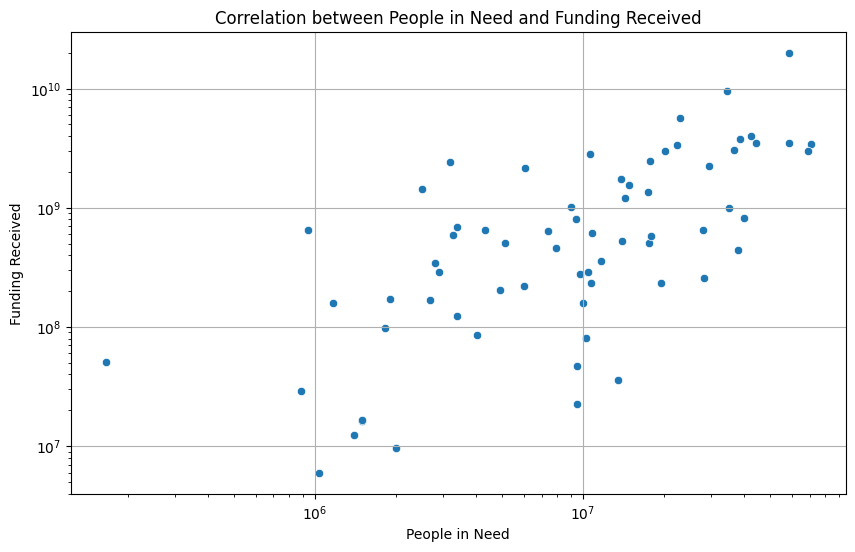

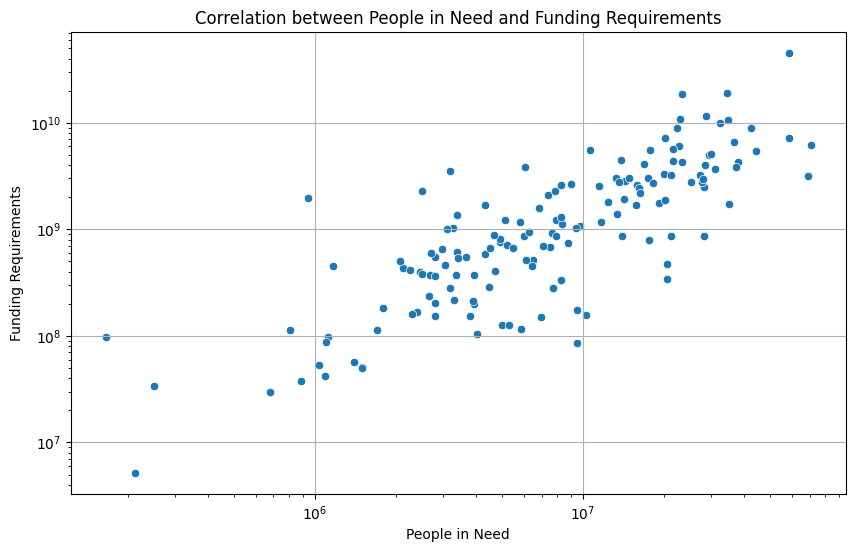

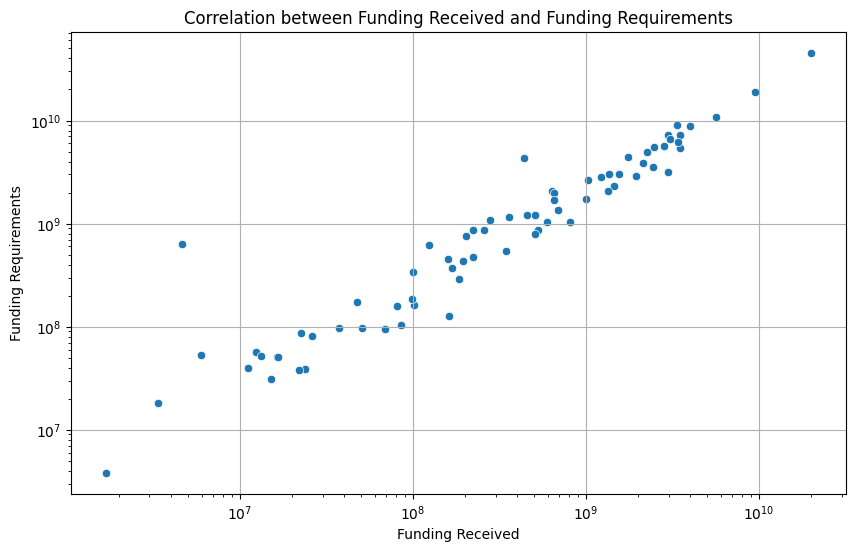

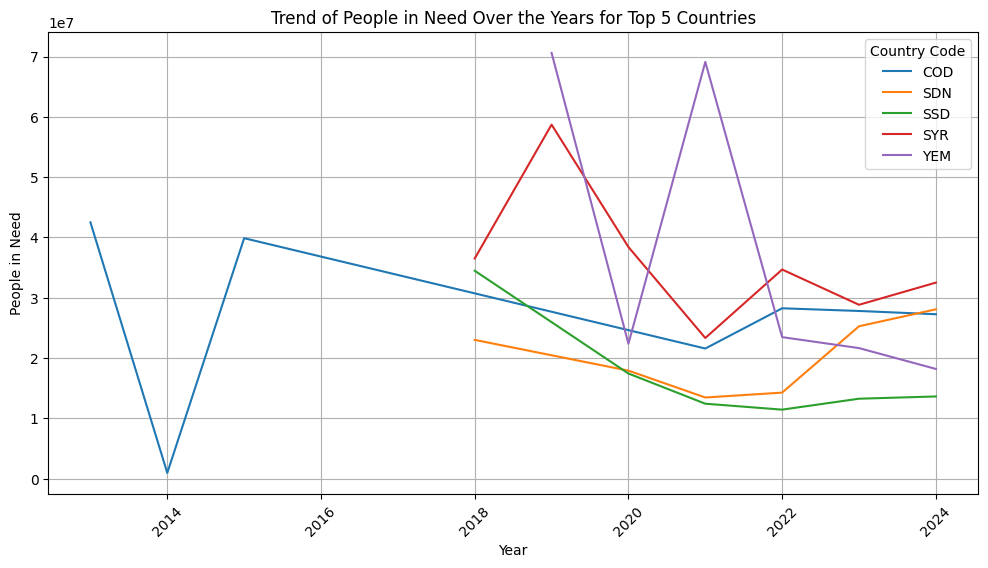

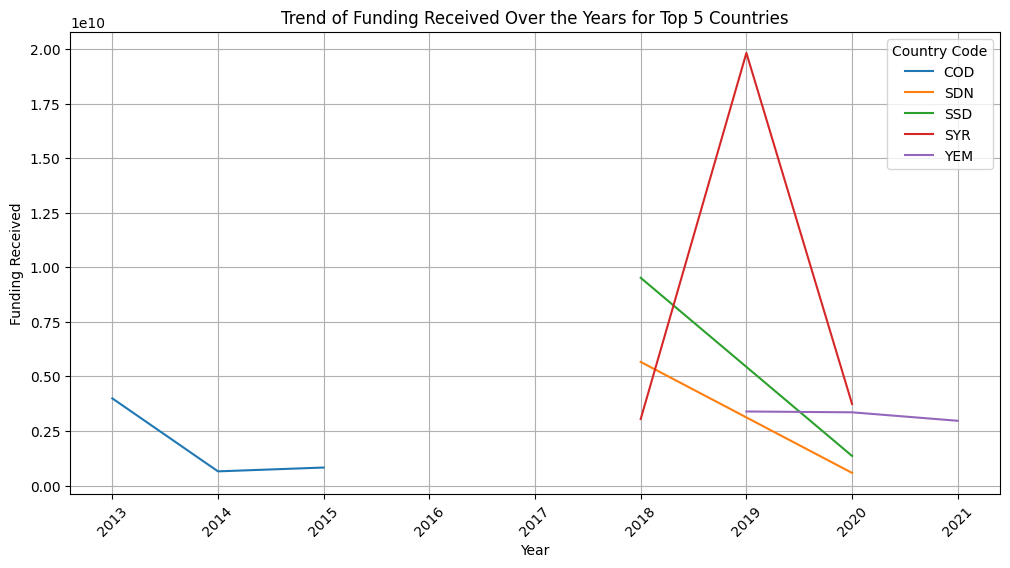

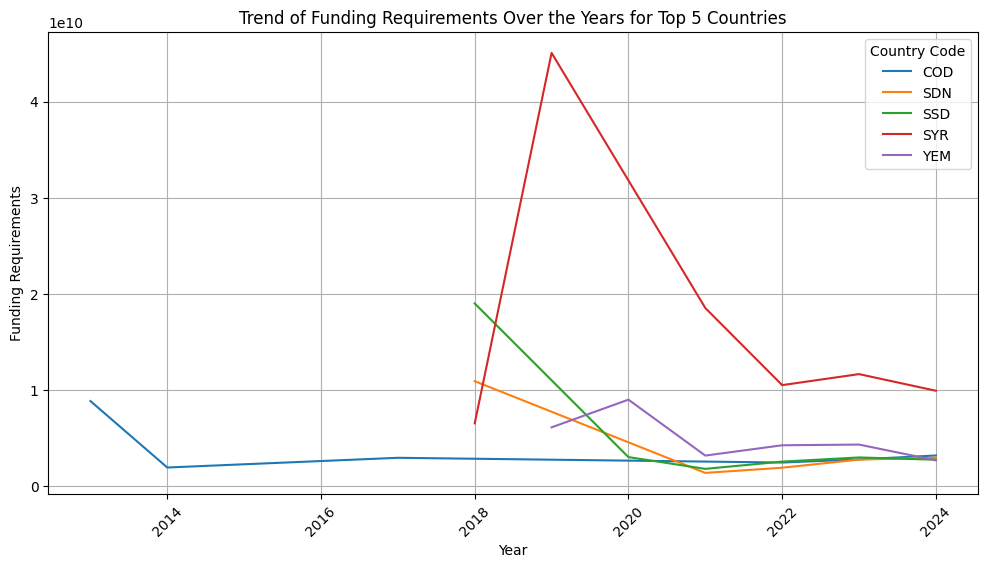

In [341]:
# Create a scatter plot to visualize the correlation between the number of people in need and the funding received
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='People_in_need', y='Funding_received')
plt.title('Correlation between People in Need and Funding Received')
plt.xlabel('People in Need')
plt.ylabel('Funding Received')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# Create a scatter plot to visualize the correlation between the number of people in need and the funding requirements
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='People_in_need', y='Funding_requirements')
plt.title('Correlation between People in Need and Funding Requirements')
plt.xlabel('People in Need')
plt.ylabel('Funding Requirements')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

# Create a scatter plot to visualize the correlation between the funding received and the funding requirements
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Funding_received', y='Funding_requirements')
plt.title('Correlation between Funding Received and Funding Requirements')
plt.xlabel('Funding Received')
plt.ylabel('Funding Requirements')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

#Here we will answer the question: What is the trend of people in need over the years for the top 5 countries with the highest number of people in need?
#Trend of people in need over the years for the top 5 countries
#Get the top 5 countries by people in need with sum over the years
top_people_trend = data.groupby('Country_Code')['People_in_need'].sum().reset_index()
top_people = top_people_trend.sort_values(by='People_in_need', ascending=False).head(5)
# Filter the people dataframe for the top 5 countries
people_top_5 = data[data['Country_Code'].isin(top_5_countries)]
# Create a line plot to visualize the trend of people in need over the years for the top 5 countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=people_top_5, x='Year', y='People_in_need', hue='Country_Code')
plt.title('Trend of People in Need Over the Years for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('People in Need')
plt.xticks(rotation=45)
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

#Here we will answer the question: What is the trend of funding received over the years for the top 5 countries with the highest number of funding received?
# Trend of funding received over the years for the top 5 countries
# Get the top 5 countries by funding received with sum over the years
top_funding_trend = data.groupby('Country_Code')['Funding_received'].sum().reset_index()
top_funding = top_funding_trend.sort_values(by='Funding_received', ascending=False).head(5)
# Filter the funding dataframe for the top 5 countries
funding_top_5 = data[data['Country_Code'].isin(top_5_countries)]
# Create a line plot to visualize the trend of funding received over the years for the top 5 countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=funding_top_5, x='Year', y='Funding_received', hue='Country_Code')
plt.title('Trend of Funding Received Over the Years for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Funding Received')
plt.xticks(rotation=45)
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

#Here we will answer the question: What is the trend of funding requirements over the years for the top 5 countries with the highest number of funding requirements?
# Trend of funding requirements over the years for the top 5 countries
# Get the top 5 countries by funding requirements with sum over the years
top_requirements_trend = data.groupby('Country_Code')['Funding_requirements'].sum().reset_index()
top_requirements = top_requirements_trend.sort_values(by='Funding_requirements', ascending=False).head(5)
# Filter the requirements dataframe for the top 5 countries
top_5_countries = top_requirements['Country_Code'].unique()
requirements_top_5 = data[data['Country_Code'].isin(top_5_countries)]
# Create a line plot to visualize the trend of funding requirements over the years for the top 5 countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=requirements_top_5, x='Year', y='Funding_requirements', hue='Country_Code')
plt.title('Trend of Funding Requirements Over the Years for Top 5 Countries')
plt.xlabel('Year')
plt.ylabel('Funding Requirements')
plt.xticks(rotation=45)
plt.legend(title='Country Code')
plt.grid(True)
plt.show()

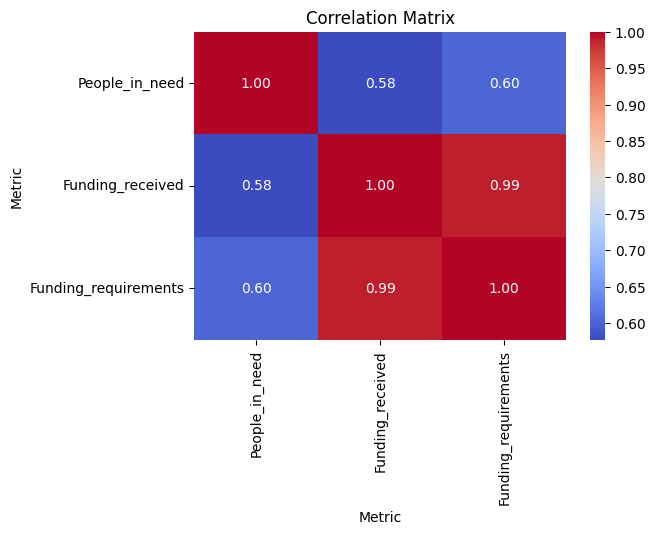

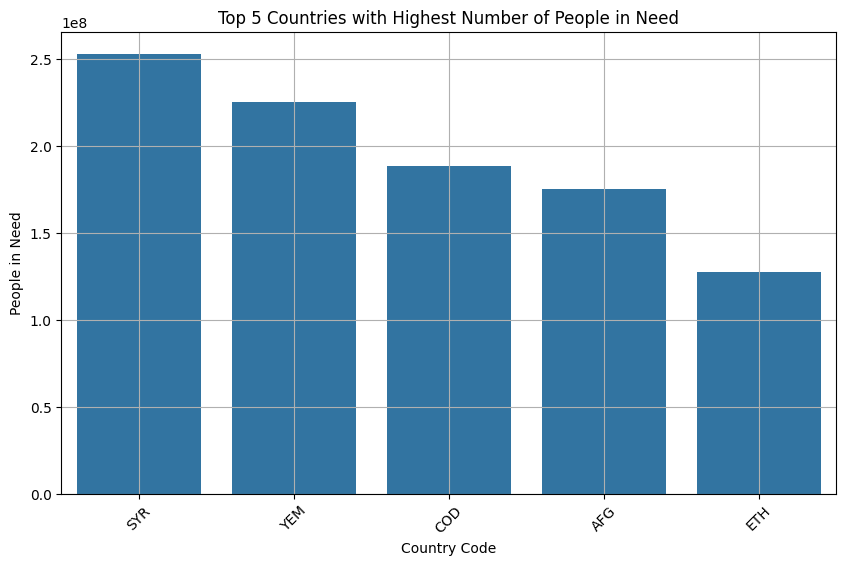

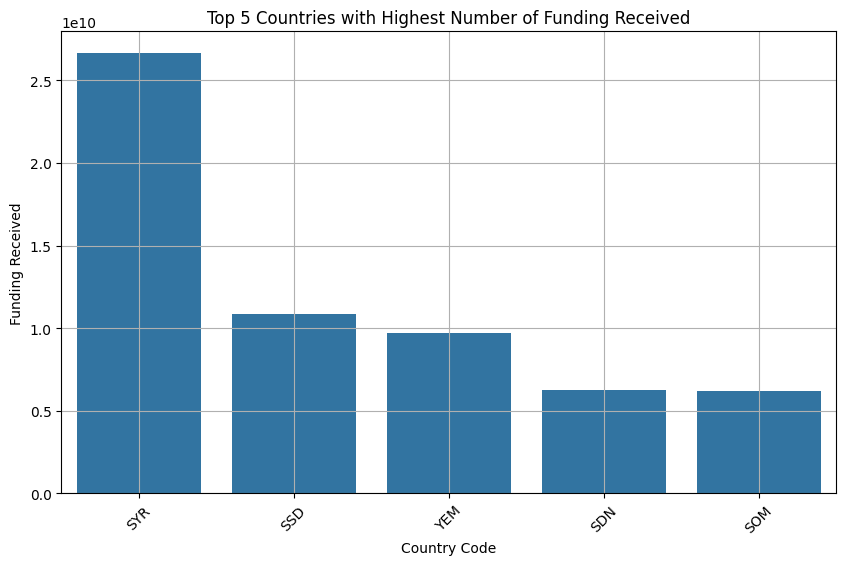

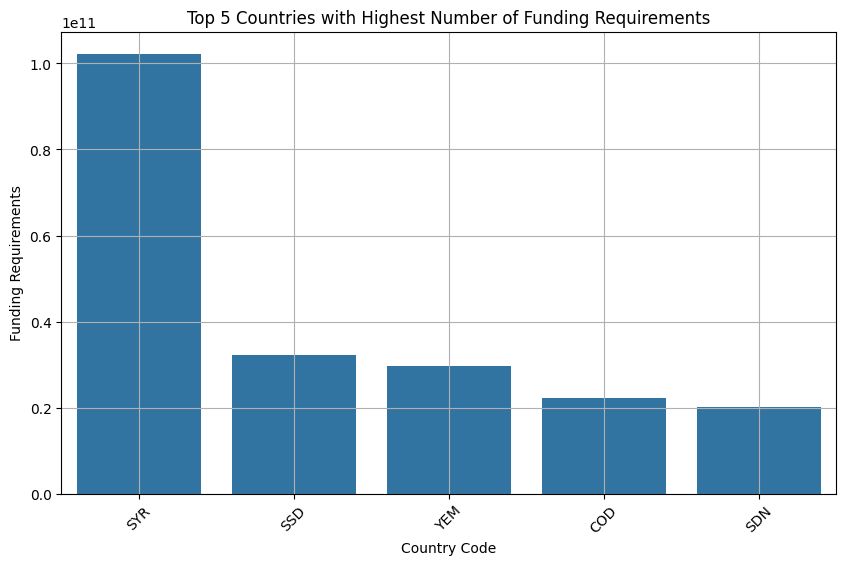

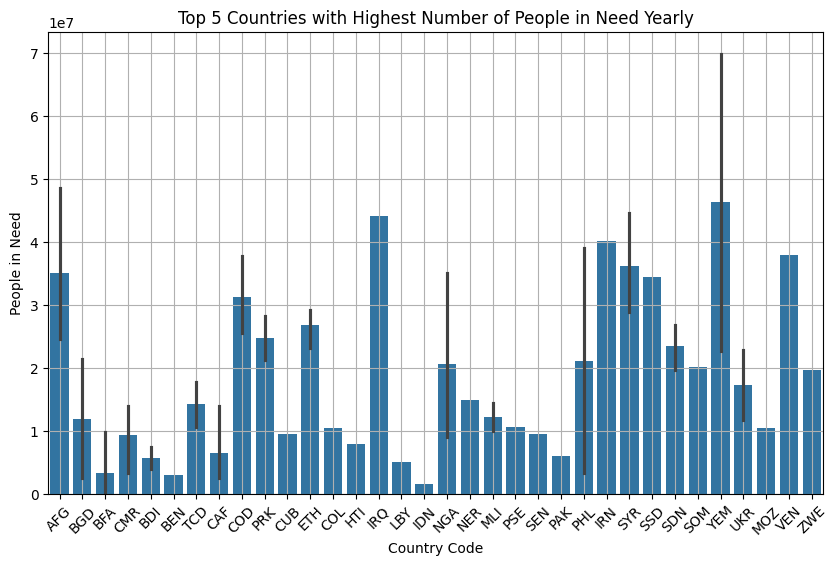

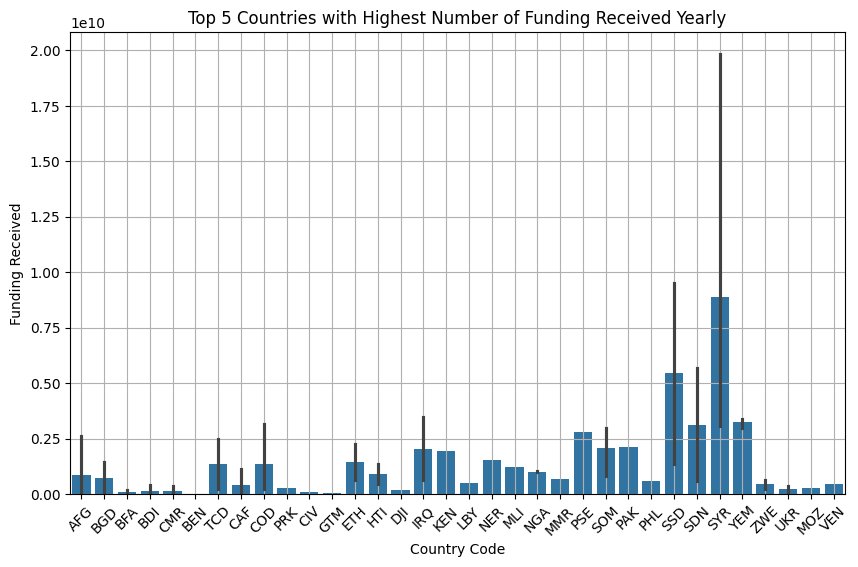

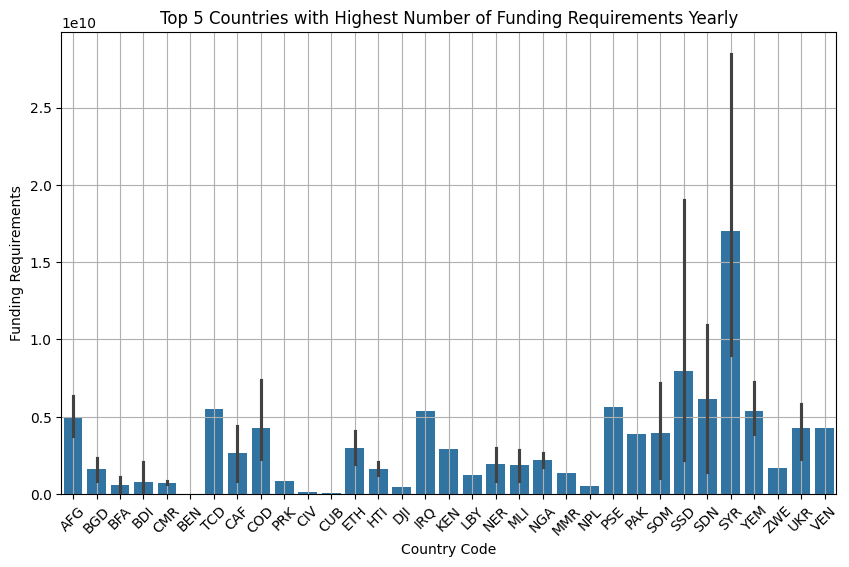

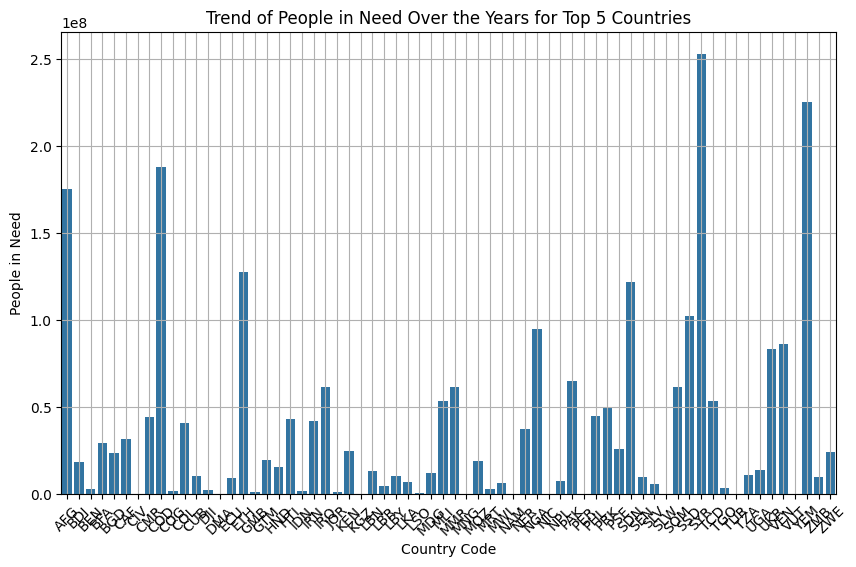

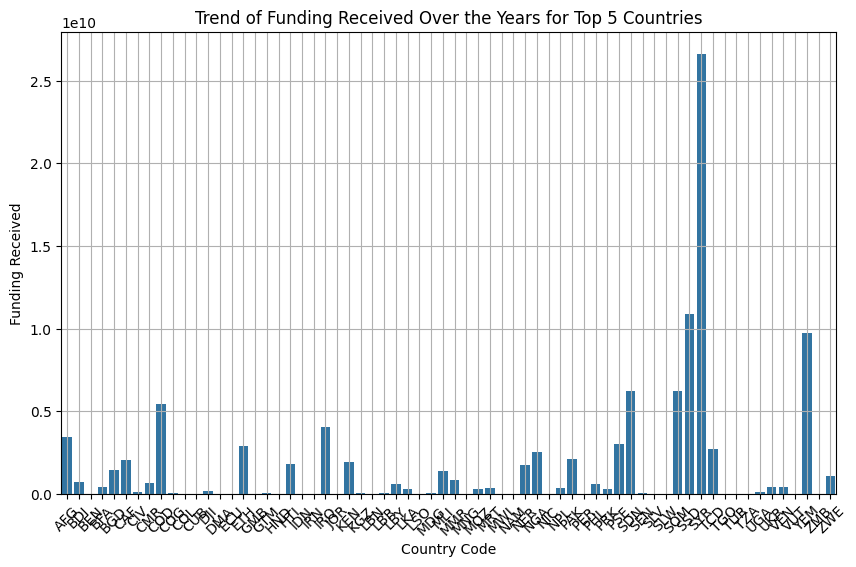

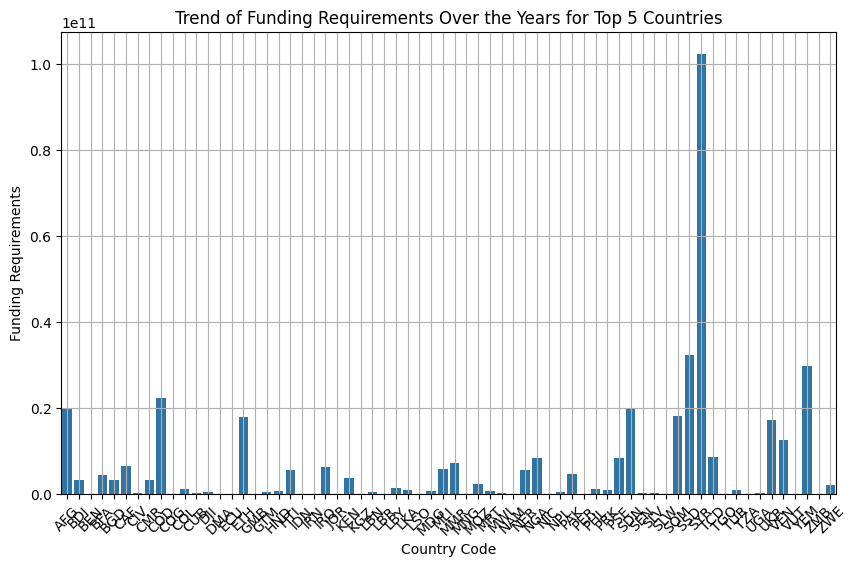

In [345]:
#Create a heatmap to visualize the correlation between the number of people in need, funding received, and funding requirements
plt.figure(figsize=(6, 4))
sns.heatmap(data[["People_in_need", "Funding_received", "Funding_requirements"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Create a bar plot to visualize the top 5 countries with the highest number of people in need
plt.figure(figsize=(10, 6))
sns.barplot(data=top_people, x='Country_Code', y='People_in_need')
plt.title('Top 5 Countries with Highest Number of People in Need')
plt.xlabel('Country Code')
plt.ylabel('People in Need')
plt.xticks(rotation=45)
plt.grid("True")
plt.show()
# Create a bar plot to visualize the top 5 countries with the highest number of funding received
plt.figure(figsize=(10, 6))
sns.barplot(data=top_funding, x='Country_Code', y='Funding_received')
plt.title('Top 5 Countries with Highest Number of Funding Received')
plt.xlabel('Country Code')
plt.ylabel('Funding Received')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Create a bar plot to visualize the top 5 countries with the highest number of funding requirements
plt.figure(figsize=(10, 6))
sns.barplot(data=top_requirements, x='Country_Code', y='Funding_requirements')
plt.title('Top 5 Countries with Highest Number of Funding Requirements')
plt.xlabel('Country Code')
plt.ylabel('Funding Requirements')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Create a bar plot to visualize the top 5 countries with the highest number of people in need yearly
plt.figure(figsize=(10, 6))
sns.barplot(data=top_people_yearly, x='Country_Code', y='People_in_need')
plt.title('Top 5 Countries with Highest Number of People in Need Yearly')
plt.xlabel('Country Code')
plt.ylabel('People in Need')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Create a bar plot to visualize the top 5 countries with the highest number of funding received yearly
plt.figure(figsize=(10, 6))
sns.barplot(data=top_funding_yearly, x='Country_Code', y='Funding_received')
plt.title('Top 5 Countries with Highest Number of Funding Received Yearly')
plt.xlabel('Country Code')
plt.ylabel('Funding Received')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Create a bar plot to visualize the top 5 countries with the highest number of funding requirements yearly
plt.figure(figsize=(10, 6))
sns.barplot(data=top_requirements_yearly, x='Country_Code', y='Funding_requirements')
plt.title('Top 5 Countries with Highest Number of Funding Requirements Yearly')
plt.xlabel('Country Code')
plt.ylabel('Funding Requirements')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Create a bar plot to visualize the trend of people in need over the years for the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_people_trend, x='Country_Code', y='People_in_need')
plt.title('Trend of People in Need Over the Years for Top 5 Countries')
plt.xlabel('Country Code')
plt.ylabel('People in Need')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Create a bar plot to visualize the trend of funding received over the years for the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_funding_trend, x='Country_Code', y='Funding_received')
plt.title('Trend of Funding Received Over the Years for Top 5 Countries')
plt.xlabel('Country Code')
plt.ylabel('Funding Received')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Create a bar plot to visualize the trend of funding requirements over the years for the top 5 countries
plt.figure(figsize=(10, 6))
sns.barplot(data=top_requirements_trend, x='Country_Code', y='Funding_requirements')
plt.title('Trend of Funding Requirements Over the Years for Top 5 Countries')
plt.xlabel('Country Code')
plt.ylabel('Funding Requirements')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Step 6: Perform Advanced Analysis: Unknown

Step 7: Data interpretation: Answering the questions from results

Which countries had the most people in need?
    The top five countries that consistently had a high number of people in need are: 
Did they also receive the most funding?
    According to the results in step ___, these countries ____.
Is there a pattern over time?
    In our year to year comparison, we see ___.

Overall, this EDA supports/nullifies/inconclusive our hypothesis of more people, more funding provided.

Step 8: Documentation and Reporting:

